In [1]:
import os
import glob
import torch
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import config
import dataset
import utils
from model import build_model
from inference import predict
%matplotlib inline

/home/hung/miniconda3/envs/pytorch/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
train_loader, test_loader, lbl_encoder, test_orig_targets = utils.prepare_data()
model = build_model("/home/hung/learn/pytorch/captcha_trainsformer/weights/model_326.pt")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


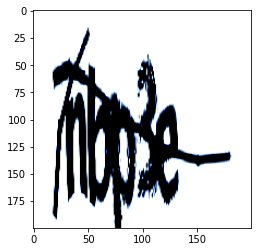

Predict: nbp3e
Attention


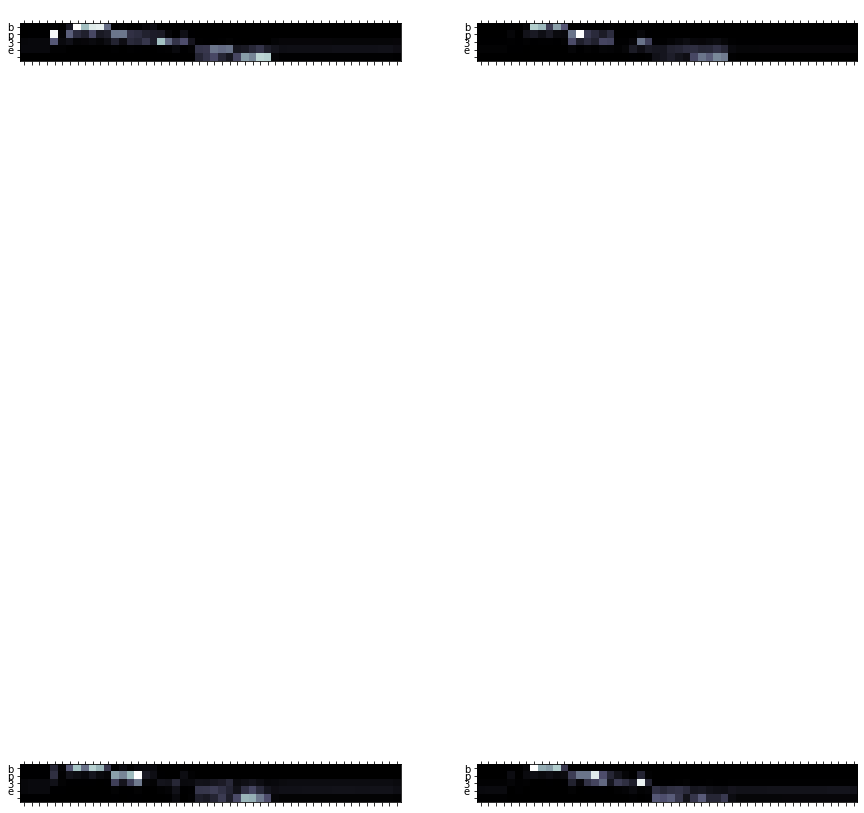

In [13]:

data = next(iter(test_loader))
img1 = data["images"].squeeze(0).numpy().transpose(1,2,0)
img = data["images"]
lbl = data["raw_targets"][0]
lbl = lbl.replace("<", "")
lbl = lbl.replace(">", "")

plt.imshow(img1)
plt.show()

res, att = predict(img, model, lbl_encoder, "cpu", 5, lbl)
print(f"Predict: {res}")
print("Attention")
utils.display_attention(res, att)

In [ ]:
# print(model)
acc = 0
for bindex, data in enumerate(test_loader):    
    for j in range(1):
        img = data["images"][j].unsqueeze(0)
        lbl = data["raw_targets"][j]
        lbl = lbl.replace("<", "").replace(">", "")        
        pred, att = predict(img, model, lbl_encoder, "cpu", 5, lbl)        
        print(f"{pred}, {lbl}")
        if res == lbl:
            acc += 1
print(f"Accuracy: {acc/len(test_loader)*100}")    